In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

%matplotlib inline

In [2]:
#Cargamos el Dataset
df = pd.read_csv("C:/Users/braya/OneDrive - Universidad Nacional Abierta y a Distancia/Desktop/UNAD/SEMESTRE 5/ANALISIS DE DATOS/TAREA 4/Anexo 5 - Dataset Mall Customer Segmentation/Mall_Customers.csv")


In [3]:
#Traemos los primeros 5 datos de cada columna
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Presentamos la información general de cada columna, como el nombre, si hay valores nulos y el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Presentamos las principales estadisticas (suma, media, desviación estandar, minimo, cuartiles, maximo)
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#Determinamos cuantas columnas y filas hay
df.shape

(200, 5)

# Procesamiento de datos

In [7]:
columnas = list(df.select_dtypes(include = ['object']).columns)
#Para seleccionar las columnas que tiene como tipo de dato object
columnas

['Gender']

In [8]:
for columna in columnas:
    print(f'El nombre de la columna: {columna}')
    print(list(df[f'{columna}'].value_counts().index))
    #Obtenemos la lista de las columnas con cada una de sus categorias por indice
    print('\n')

El nombre de la columna: Gender
['Female', 'Male']




In [9]:
#Contamos cuantos valores nulos hay en cada columna
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
#La funcion contruye un diccionario por columna done reemplaza las categorias por numeros
def procesar_datos():
    global df_proc
    df_proc = df.drop_duplicates() if df.duplicated().any() else df
    #Elimina datos duplicados
    df_proc = df.dropna() if df.isnull().values.any() else df
    #Elimina datos nulos
    
    a = {'Female': 0,
        'Male': 1
    }

    df_proc['Gender'] = df_proc['Gender'].map(a)

In [11]:
procesar_datos()

df_proc
#Se observa que las variables categoricas ahora se presentan como numeros con el fin de facilitar el análisis de modelos predictivos

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [12]:
df_proc.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


Al no haber valores nulos ni duplicados, buscamos si hay valores atipicos analizando las graficas de barras e histogramas para cada columna

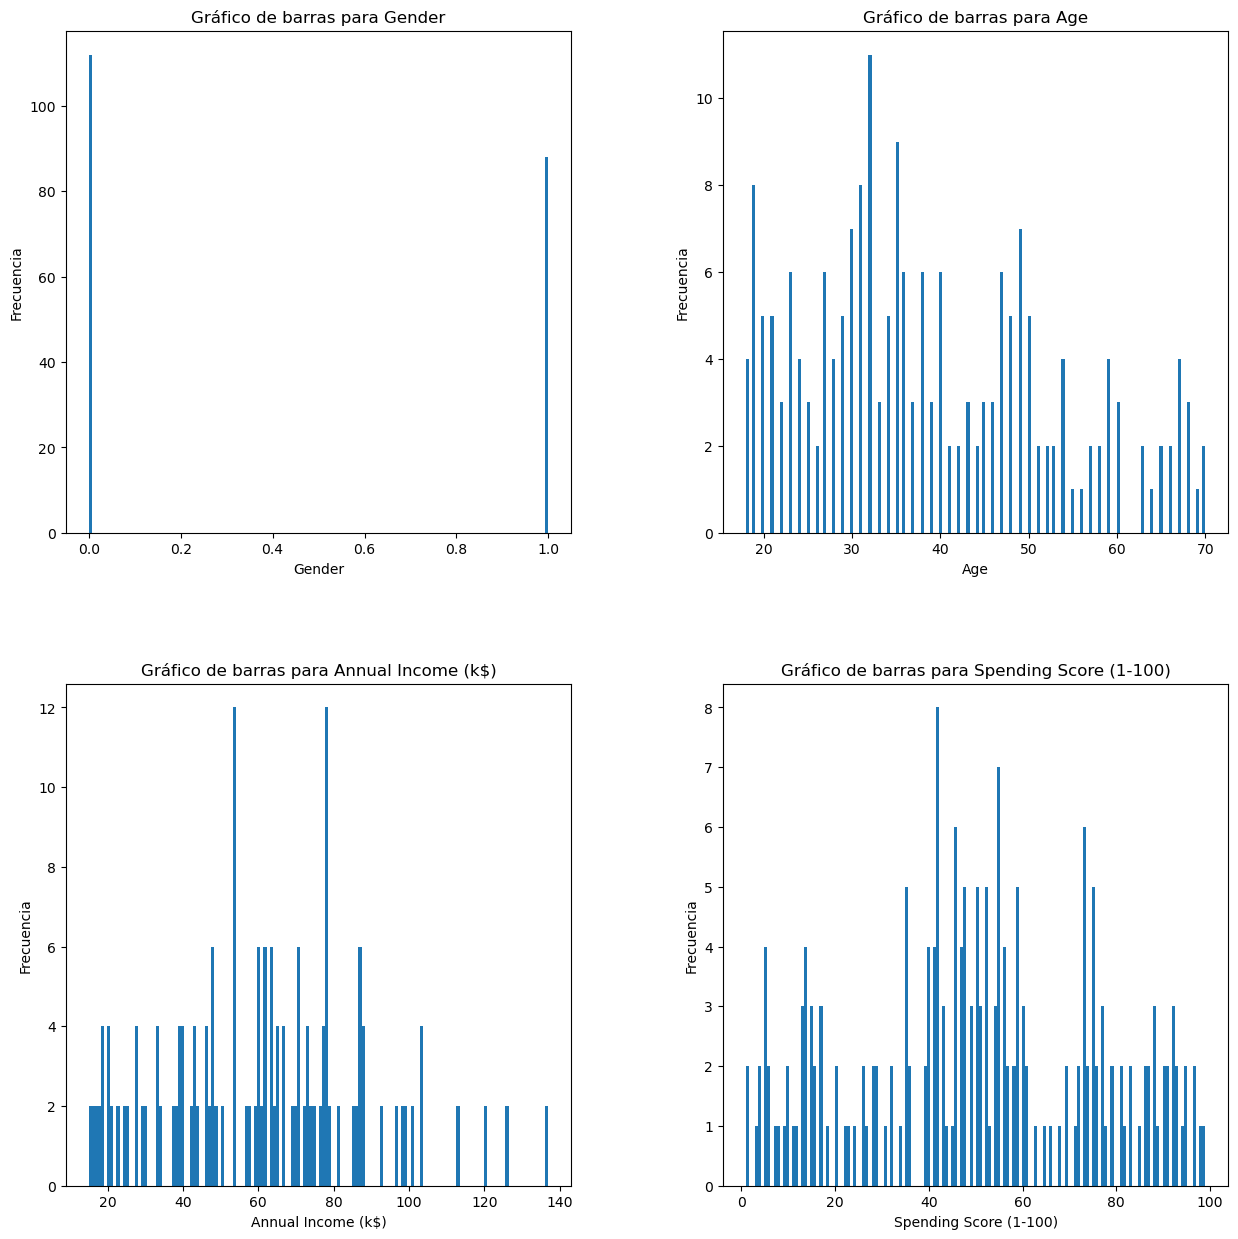

In [13]:
#Graficamos las variables numericas en graficos de histogramas
n_filas = 2
n_columnas = 2

fig, axs = plt.subplots(n_filas, n_columnas, figsize=(15,15)) #Dentro de la misma figura creamos 4 graficas

plt.subplots_adjust(wspace=0.3, hspace=0.3)

columnas = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i, columna in enumerate(columnas):
    # Calcular la posición del subplot
    fila = i // n_columnas
    col = i % n_columnas
    
    # Verificar si el índice está dentro del rango del número de columnas
    if i < len(columnas):
        
        # Crear el gráfico de histograma en el subplot correspondiente
        axs[fila, col].hist(df_proc[columna], bins=150)
        
        # Añadir títulos y etiquetas
        axs[fila, col].set_title(f'Gráfico de barras para {columna}')
        axs[fila, col].set_xlabel(columna)
        axs[fila, col].set_ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

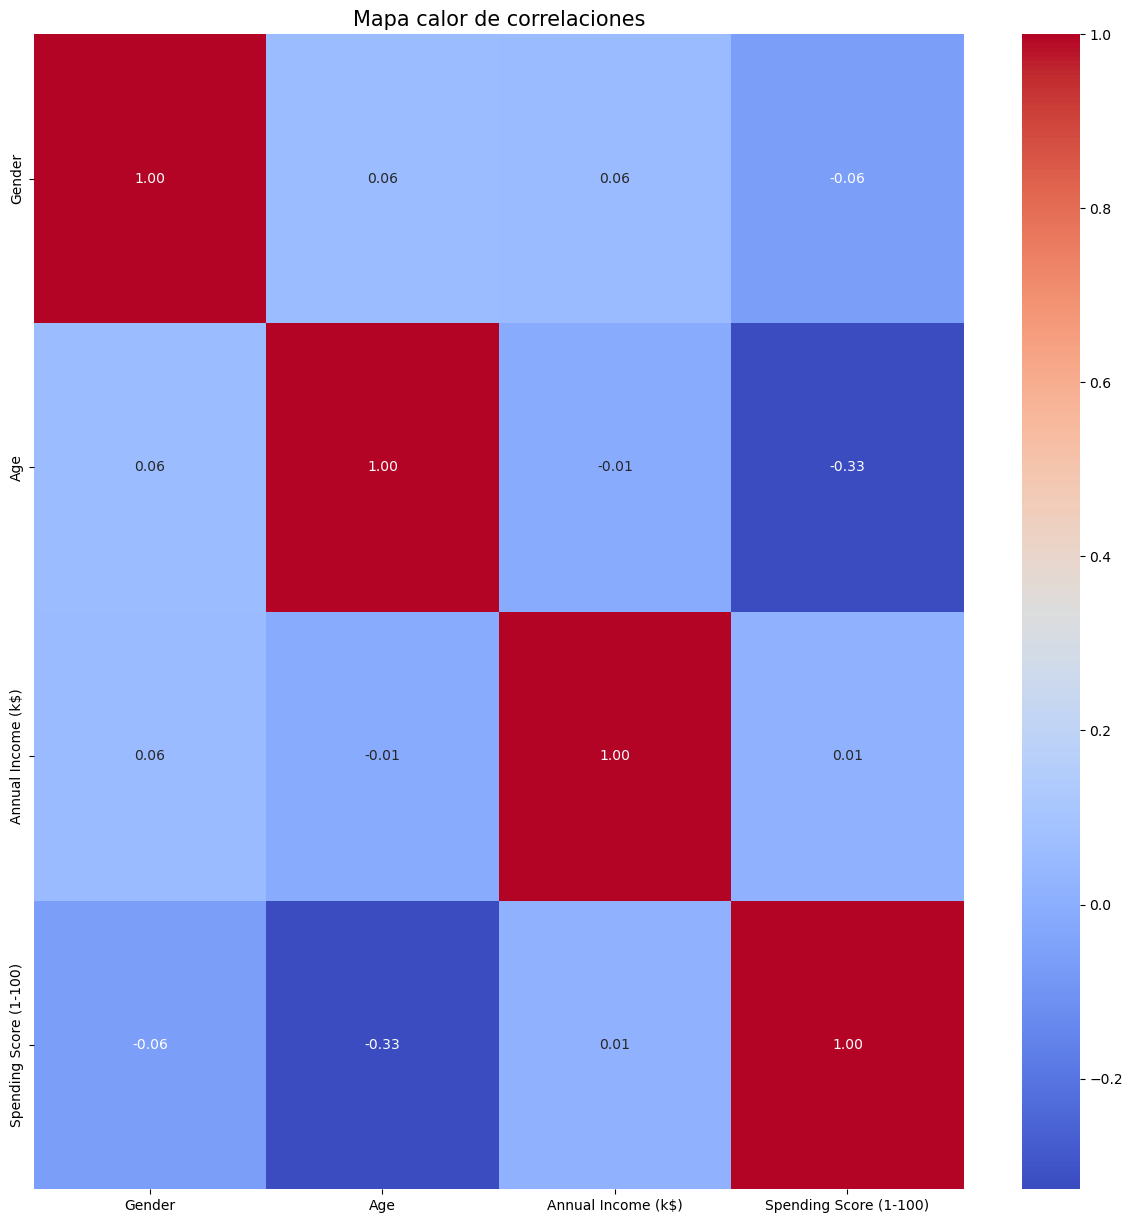

In [14]:
#Matriz de correlación
plt.figure(figsize = (15,15))
heatmap = sns.heatmap(df_proc.drop(columns='CustomerID').corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
#Corr es el metodo de correlación entre variables
#annot permite visualizar anotaciones; Cmap permite darle color al mapa; fmt es la cantidad de decimales
plt.title('Mapa calor de correlaciones', fontsize = 15)
plt.show()

In [17]:
#Eliminamos la columna CustomerID ya que no la requerimos para el análisis
df_proc = df_proc.drop(columns='CustomerID')
df_proc.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


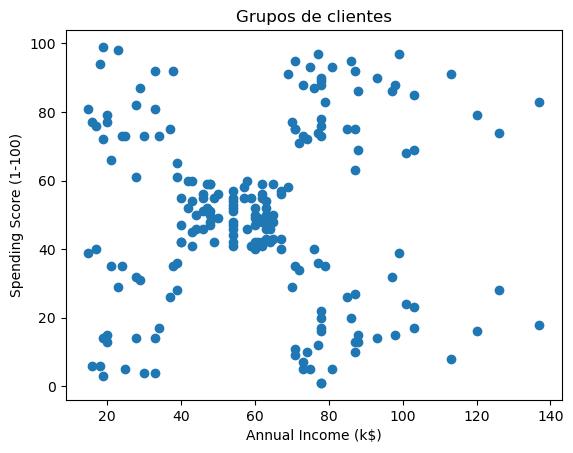

In [18]:
#Grafica antes de agrupamiento
plt.scatter(df_proc['Annual Income (k$)'], df_proc['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de clientes')
plt.show()

# Modelo No Supervisado (KMean)

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
#Importamos biblioteca KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
#Importamos metricas de evaluación
import warnings
warnings.filterwarnings('ignore')
#Libreria para evitar advertencia por perdida de memoria en Windows

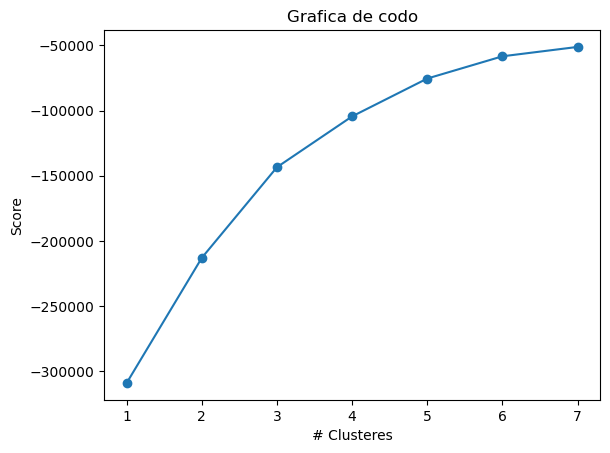

In [20]:
#Grafico de codo para identificar el valor de K

Nc = range(1 , 8)
Kmeans = [KMeans(n_clusters = i) for i in Nc]
Kmeans
score = [Kmeans[i].fit(df_proc).score(df_proc) for i in range(len(Kmeans))]
score
plt.plot(Nc, score, marker = 'o')
plt.xlabel('# Clusteres')
plt.ylabel('Score')
plt.title('Grafica de codo')
plt.show()

In [21]:
#Generamos el modelo con K = 5 (es decir, 5 grupos de agrupamiento)
Model = KMeans(n_clusters = 5, random_state = 0)
Model.fit(df_proc)

KMeans(n_clusters=5, random_state=0)

In [22]:
#Etiquetamos los datos por grupos para identificar el # de grupo
Model.labels_ 
df_proc['Group'] = Model.labels_
print(df_proc)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)  Group
0         1   19                  15                      39      0
1         1   21                  15                      81      3
2         0   20                  16                       6      0
3         0   23                  16                      77      3
4         0   31                  17                      40      0
..      ...  ...                 ...                     ...    ...
195       0   35                 120                      79      1
196       0   45                 126                      28      4
197       1   32                 126                      74      1
198       1   32                 137                      18      4
199       1   30                 137                      83      1

[200 rows x 5 columns]


In [26]:
#Evaluamos el modelo
observaciones = len(df_proc)
X = df_proc.drop('Group', axis = 1)
clusters = df_proc['Group']

#Metricas a evaluar
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

#Mostramos los resultados en una tabla
table_data = [
    ['Numero Observaciones', observaciones],
    ['Coeficiente Silhouette', sil_score],
    ['Indice Calinski Harabasz', calinski_score],
    ['Indice Davies Boudin', davies_score]
]

from tabulate import tabulate
print(tabulate(table_data, headers= ['Metrics', 'Value'], tablefmt = 'pretty'))

+--------------------------+--------------------+
|         Metrics          |       Value        |
+--------------------------+--------------------+
|   Numero Observaciones   |        200         |
|  Coeficiente Silhouette  | 0.4440669204743008 |
| Indice Calinski Harabasz | 150.94631598679595 |
|   Indice Davies Boudin   | 0.8222596417814187 |
+--------------------------+--------------------+


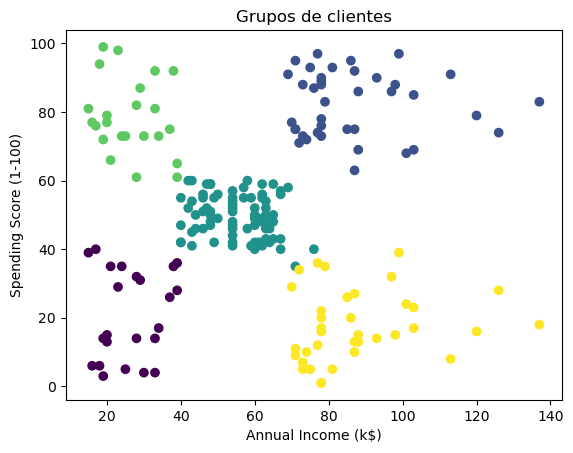

In [27]:
#Grafica despues de agrupar los datos

plt.scatter(df_proc['Annual Income (k$)'], df_proc['Spending Score (1-100)'], c = df_proc['Group'], cmap = 'viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de clientes')
plt.show()

In [34]:
#Grafica 3D por edad de los datos despues del agrupamiento
Grafica_3D = px.scatter_3d(df_proc, x= 'Annual Income (k$)', y= 'Spending Score (1-100)', z= 'Age', color= 'Group', symbol= 'Group', symbol_map= {0: 'circle', 1:'circle', 3:'circle', 4:'circle', 5:'circle'}, title='Grupos de clientes por edad')
Grafica_3D.update_layout(showlegend= False)

In [32]:
#Grafica 3D por genero de los datos despues del agrupamiento
Grafica_3D = px.scatter_3d(df_proc, x= 'Annual Income (k$)', y= 'Spending Score (1-100)', z= 'Gender', color= 'Group', symbol= 'Group', symbol_map= {0: 'circle', 1:'circle', 3:'circle', 4:'circle', 5:'circle'}, title='Grupos de clientes por genero')
Grafica_3D.update_layout(showlegend= False)